<a href="https://colab.research.google.com/github/2xazo/classification/blob/main/SVM_mnist_hand_written.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3: MNIST Classification Lab

## Step 1: Calling Important Packages & Libraries


In order to set-up any machine learning environment classifying images from the MNIST dataset, which consists of handwritten digits. The process involves several key steps:

**1- Library Installation and Importing:**

We begin by updating and installing the latest version of scikit-learn using pip, a package manager for Python.

Then, we import necessary modules from tensorflow.keras for loading the MNIST dataset, sklearn for model training and evaluation, and numpy with matplotlib for data manipulation and visualization.

**2- Data Loading:**

from tensorflow.keras.datasets import mnist imports the MNIST dataset loader. The MNIST dataset is a large database of handwritten digits that is commonly used for training various image processing systems.

**3- Data Preparation:**

The data is then split into training and testing sets using train_test_split from sklearn.model_selection. This function divides the data into a portion for training the model and a portion for testing its performance to ensure that the evaluation is unbiased.

**4- Model Training:**

An SVM (Support Vector Machine) classifier is instantiated with SVC(). The SVM is a popular machine learning model for classification tasks. It works well for a range of complex classification problems.

**5-Model Evaluation:**

After training, the model's performance is evaluated using accuracy_score and confusion_matrix from sklearn.metrics. The accuracy score provides a straightforward indication of the model's overall correctness by comparing the predicted labels against the true labels.

The confusion matrix offers a deeper insight into the model's performance, detailing the correct and incorrect classifications.

**6- Results Visualization:**

matplotlib.pyplot is used to create visual representations of data, which are crucial for interpreting the model's behavior more intuitively. It might be used further in the notebook to plot data such as the confusion matrix or examples of MNIST digits.

This setup provides a robust framework for developing a digit classification system, allowing for straightforward experiments with different model configurations and evaluation metrics to optimize performance.

In [ ]:
!pip install -U scikit-learn

from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Loading & Reshaping the Images

We start by an initial steps in the preprocessing pipeline for machine learning applications using the MNIST dataset, which consists of handwritten digits commonly used for training image processing systems.

**1-Loading the Dataset:**

It starts by loading the MNIST dataset using the load_data() function from TensorFlow's Keras API. This function conveniently returns two tuples: one for training (X, y) and one for testing (X_test, y_test). **The X variables contain the image data—grayscale images of handwritten digits—while the y variables contain the corresponding labels indicating the digit each image represents.**

**2- Reshaping the Data:**

Once the dataset is loaded, the images, which are initially in a 3-dimensional format (number of images, height, width), need to be reshaped.

This is necessary because most machine learning algorithms, including SVMs used later, expect input data to be in a 2-dimensional format (number of samples, number of features).

Here, **each 28x28 pixel image is flattened into a 784-element vector (28*28).** The reshaping is done using the reshape method:

So, in the

1- X = X.reshape(-1, 28*28): Reshapes the training images into a two-dimensional array where each row represents an image, and each column represents a pixel value.

2- X_test = X_test.reshape(-1, 28*28): Similarly, reshapes the testing images.

This transformation is essential for the compatibility of image data with machine learning algorithms that do not natively process 2D data per image.

By flattening the images, each pixel becomes a separate feature, allowing algorithms to process each pixel's intensity as a numerical value, facilitating the subsequent training and classification processes.

This step simplifies the dataset, aligning it with the expected input structure for most scikit-learn estimators, thereby setting the stage for effective model training.

In [ ]:
# Load the MNIST dataset
(X, y), (X_test, y_test) = mnist.load_data()

# Reshape data to 2D arrays
X = X.reshape(-1, 28*28)  # Flatten the training images
X_test = X_test.reshape(-1, 28*28)  # Flatten the test images


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Step 3: Data Splitting

Now, we effectively divides the reshaped MNIST training data into two distinct sets: **a training set and a validation set.**

This step is critical in the machine learning workflow as it enables the evaluation of the **model's performance during training on unseen data**, helping to prevent overfitting and ensuring that the model generalizes well to new, external data.

We used:

**1-train_test_split** is a utility from scikit-learn designed to split datasets into random train and test subsets. Here, it's used to carve out a validation set from the original training data.
Parameters Explained:

**1-a- X and y:** These are the input features and target labels from the MNIST dataset that were previously reshaped to suit machine learning models.

**1-b- test_size=0.1:** This parameter specifies that 10% of the data should be set aside for the validation set. The choice of size typically balances sufficient training data with enough validation data to reliably evaluate the model's performance.

**1-c random_state=42:** This ensures that the split is reproducible; the same random seed (42) means that the split will be identical each time the code is run, which is crucial for debugging and comparing model iterations.

**1-d Output:**

**X_train, y_train:** These are the features and labels for training the model. They will be used in the fitting process where the model learns to classify digits based on the features.

**X_val, y_val:** These are the features and labels set aside as a validation set not seen by the model during training. After training, this set is used to evaluate how well the model performs on data it hasn't seen, providing a good estimation of its performance in real-world scenarios.

By using a separate validation set, you can monitor and tune the model's parameters without biasing its performance estimate, as might occur if it were repeatedly tested on the same test data. This setup helps in identifying the optimal model settings, contributing significantly to the development of a robust model that performs well on any new data.

In [ ]:
# Split the reshaped training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


## Step 4: Data Reduction

We are to streamline the training process by reducing the volume of data involved.

We select a smaller subset from the larger training dataset, specifically targeting **the first 10,000 samples.** This approach is particularly advantageous when experimenting with model architectures or parameters, as it significantly **cuts down on computational time and resources.**

**Key components of the code:**

**Data Subset Selection:**

**1- X_train[:10000]:**

This slices the array X_train to include only the first 10,000 images. These images are stored in X_small, serving as the feature set for this reduced dataset.

**2-y_train[:10000]:**

Similarly, this slices the array y_train to include only the labels corresponding to the first 10,000 images. These labels are stored in y_small, aligning with the features in X_small.

In [ ]:
# Define a smaller subset of the training data for faster training
X_small = X_train[:10000]  # Use the first 10000 samples
y_small = y_train[:10000]  # Corresponding labels for those samples


## Step 5: Model Training

We are now to train a Support Vector Machine (SVM) model using a smaller subset of the training data.

The purpose is to train the model efficiently while still harnessing the powerful classification capabilities of the SVM.

**Key Actions Performed in the Code:**
Model Initialization:

**1-model = SVC(kernel='linear', random_state=42):**

Here, an SVM model is instantiated using the SVC class from the scikit-learn library. **The kernel='linear' parameter specifies that the SVM should use a linear kernel, which is suitable for linearly separable data.**

The random_state=42 ensures that **the training process is reproducible; the same random seed guarantees consistent results across multiple runs.**

**2-Model Training:**

model.fit(X_small, y_small):

This line trains the SVM model on the smaller subset of data (X_small and y_small).

The fit method adjusts the model parameters to minimize the error in predicting the training labels, effectively learning from the first 10,000 samples and their corresponding labels.

In [ ]:
# Train the SVM model with the smaller subset
model = SVC(kernel='linear', random_state=42)  # Create an SVM model
model.fit(X_small, y_small)  # Train the model on the smaller subset


SVC(kernel='linear', random_state=42)

# Step 6: Model Evaluation

We now evaluate the trained Support Vector Machine (SVM) model on a separate validation dataset to determine its accuracy, which is the proportion of correct predictions made by the model compared to the actual labels.

**Key Components of the Evaluation:**

**1-Model Evaluation:**

val_accuracy = model.score(X_val, y_val):

This line uses the score method of the SVM model. The score method internally **makes predictions for the input features (X_val) and then compares these predictions to the actual labels (y_val)** to compute the accuracy metric.

The accuracy is calculated as the **number of correct predictions divided by the total number of predictions made**, providing a straightforward indicator of the model's performance.

**2-Output Display:**

print("Validation set accuracy:", val_accuracy):

This prints out the calculated validation accuracy.

Displaying this metric helps in understanding how well the model performs on unseen data, which is critical for assessing its potential effectiveness in real-world applications.

In [ ]:
# Evaluate the model on the validation set
val_accuracy = model.score(X_val, y_val)  # Calculate validation accuracy
print("Validation set accuracy:", val_accuracy)


Validation set accuracy: 0.9091666666666667


# Step 7: Model Testing & Challenging

We now perform a critical step in the machine learning workflow: evaluating the trained Support Vector Machine (SVM) model on **the original test dataset** to assess its performance.

This measure provides an **unbiased evaluation of the model's effectiveness**, as the test set comprises entirely unseen data that did not influence the training process.

**Key Actions and Components:**

**1-Model Evaluation on Test Data:**

test_accuracy = model.score(X_test, y_test):

The score method of the SVM model is used here. It computes the accuracy of the model by comparing **its predictions for the test set features (X_test)** against the actual labels (y_test).

The accuracy metric is defined as the ratio of correct predictions to the total number of instances in the test set.

**2-Displaying the Accuracy:**

print("Test set accuracy:", test_accuracy): This line outputs the calculated test accuracy.

Displaying this value is vital for understanding the model's real-world applicability, providing a quantitative measure of how well the model can generalize its predictions to new data.

In [ ]:
# Optionally, evaluate on the original test set
test_accuracy = model.score(X_test, y_test)  # Calculate test accuracy
print("Test set accuracy:", test_accuracy)


Test set accuracy: 0.9144


# Step 8: Model Prediction

We now are to be leveraging the trained Support Vector Machine (SVM) model to **make predictions** on the test set, which comprises images from the MNIST dataset.

The predictions are aimed at identifying the digits represented by these images, based on the learning the model underwent during training.

**Detailed Steps and Analysis:**

**1-Making Predictions:**

y_pred = model.predict(X_test):

The predict method of the SVM model is applied to the X_test dataset.

**X_test contains the feature sets (flattened pixel values of images) for each test sample.**

The predict function uses the model's learned parameters to **forecast the output labels** for these features, essentially guessing the digits depicted in the images.

**Role of X_test:**

X_test are the images:

The images in the test set, already reshaped into a 2D array where each row represents an image in flattened form, serve as the input for the prediction.

The reshaping into 1D arrays is necessary as SVMs, like many machine learning algorithms, require input data in this format for processing.

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)  # Use the trained model to predict labels
#X_test are the images

#Step 9: Results Visualization

We now effectively summarizes the post-model training evaluation phase for a classification task using the MNIST dataset.

We calculate the model's accuracy, generates a confusion matrix, and visualizes this matrix to provide both quantitative and qualitative insights into the model's performance.

**Key Components of the Code:**

**Accuracy Calculation:**

**accuracy = accuracy_score(y_test, y_pred):**

This function computes the proportion of correct predictions (where the predicted labels match the actual labels) to the total number of predictions made. The result is a straightforward, interpretable metric that gives a quick overview of model performance.

**print(f'\nAccuracy: {accuracy * 100:.2f}%'):**

This line prints the accuracy as a percentage, providing an immediate understanding of the effectiveness of the model in classifying new, unseen data.
Confusion Matrix Generation:

**conf_matrix = confusion_matrix(y_test, y_pred):**

Generates the confusion matrix which provides a detailed breakdown of the model's predictions across different classes, showing where it performs well and where it tends to make errors.

**print("\nConfusion Matrix:"):**

This and the subsequent print function display the confusion matrix in a tabular format, allowing for a preliminary manual inspection of the model's performance across different classes.
Visualization of Confusion Matrix:

**The plot setup with fig, ax = plt.subplots() and cax = ax.matshow(conf_matrix, cmap='coolwarm') creates a heatmap representation of the confusion matrix.**  

This visualization uses color gradients to highlight areas of high and low values, which helps in quickly identifying patterns of misclassification.

**fig.colorbar(cax):**

Adds a color bar on the side of the heatmap, which acts as a legend to understand the scale of values represented by different colors.

**Labels and ticks setup (ax.set_title, ax.set_xlabel, ax.set_ylabel, etc.):**

These lines configure the title and axis labels of the heatmap, enhancing readability and providing context to the visualization.

**ax.set_xticks() and ax.set_yticks():**

These lines set the positions for the tick marks on the axes, corresponding to the unique labels/classes in the dataset. This ensures that each tick aligns with a particular class.


Accuracy: 91.44%

Confusion Matrix:
[[ 956    0    3    2    0    8    8    1    0    2]
 [   0 1120    3    5    0    3    1    0    2    1]
 [  10   14  948   12    8    2   10   10   16    2]
 [   4    5   28  919    1   22    2    8   15    6]
 [   5    2   11    0  919    1    3    7    3   31]
 [  12    3   14   54    7  764   13    1   19    5]
 [  17    3   17    0    9   22  888    0    2    0]
 [   0    9   23    9   12    0    1  941    1   32]
 [  11    8   16   51   14   42    1    9  817    5]
 [   8    7    2   11   47    7    1   38   16  872]]


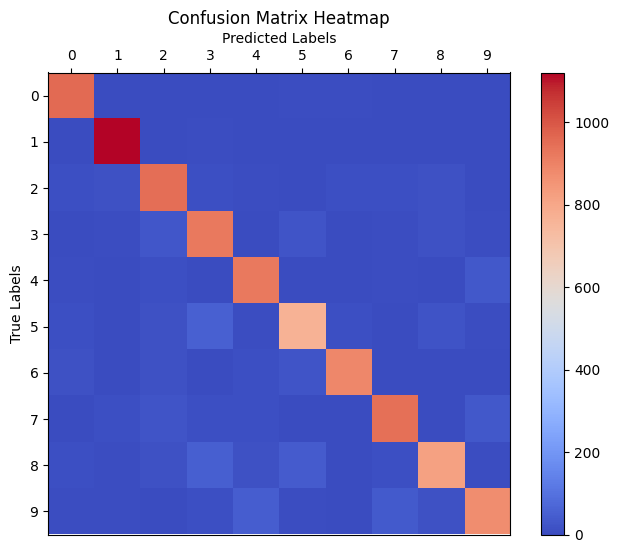

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming y_test and y_pred are already defined
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f'\nAccuracy: {accuracy * 100:.2f}%')  # Print accuracy as a percentage

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  # Create a confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)  # Print the confusion matrix

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and a set of subplots
cax = ax.matshow(conf_matrix, cmap='coolwarm')  # Heatmap for the confusion matrix using matshow
fig.colorbar(cax)  # Add a color bar to the plot

ax.set_title('Confusion Matrix Heatmap')  # Title of the heatmap
ax.set_xlabel('Predicted Labels')  # X-label
ax.set_ylabel('True Labels')  # Y-label

# Set tick marks for class labels
ax.set_xticks(np.arange(len(np.unique(y_test))))
ax.set_yticks(np.arange(len(np.unique(y_test))))


ax.xaxis.set_label_position('top')  # Position the X-axis label at top to match common convention
ax.xaxis.tick_top()

plt.show()

# Step 10: Model Operation

This block of code is designed for combining the training and test datasets of the MNIST digit images into a single dataset and **visualizing a random image from this combined dataset.**  

Here's a breakdown of each step and its purpose:

**Key Components and Process:**

**1-Data Flattening and Combination:**

X_flat = X.reshape(-1, 28 * 28): This line reshapes the training images (X), originally in a 3D array format (number of images, 28 pixels, 28 pixels), into a 2D array where each row represents one flattened image. This transformation converts each 28x28 pixel image into a single 784-element vector.
xt = np.concatenate((X_flat, X_test), axis=0): Combines the flattened training images (X_flat) with the already flattened test images (X_test) into a single dataset (xt). The concatenate function from NumPy is used here with axis=0 to stack the two datasets vertically, effectively increasing the number of rows (images) while keeping the number of features (pixels) the same.

**2-Random Image Visualization:**

index = np.random.randint(0, xt.shape[0]): This line selects a random index from the combined dataset. np.random.randint generates a random integer between 0 and the total number of images in xt, which is determined by xt.shape[0] (the first dimension of xt).

image1 = xt[index]: Retrieves the image corresponding to the randomly selected index. This image is still in its flattened form.

image2d = image1.reshape(28, 28): Reshapes the flattened image back into its original 28x28 pixel format for visualization purposes. This step is necessary because image visualization tools expect data in a 2D (or higher) format.

plt.imshow(image2d, cmap='gray'): Displays the image using Matplotlib's imshow function, which renders a 2D array as an image. The cmap='gray' argument specifies that the image should be displayed in grayscale, reflecting the original format of MNIST images.

**3-Plot Display:**

plt.show(): This command generates the output plot window that visually presents the selected image. It's essential for actually displaying the figure created by imshow.

**4-Image Reshaping for Model Input:**

image2 = image1.reshape(-1, 28 * 28): Before making a prediction, the selected image (image1) needs to be reshaped to match the input format expected by the model. In this case, image1 is reshaped into a 2D array where each row corresponds to an image and each column to a pixel value. The -1 in the reshape method allows NumPy to automatically calculate the number of rows needed to maintain the same number of elements, ensuring that the image is presented as a single row vector of 784 pixels (28x28).

**5-Model Prediction:**

y_pred1 = model.predict(image2): This line uses the predict method of the trained model to determine the label of the reshaped image. The model processes the input vector (image2), applying learned patterns to estimate the most likely class label for the image.

**6-Output Display:**

print(f'Predicted label for the selected image: {y_pred1[0]}'): Since the predict method can handle multiple inputs and thus returns an array of predictions, y_pred1[0] accesses the first (and in this case, only) prediction result. This output is then formatted and printed, clearly indicating the model's prediction for the image.

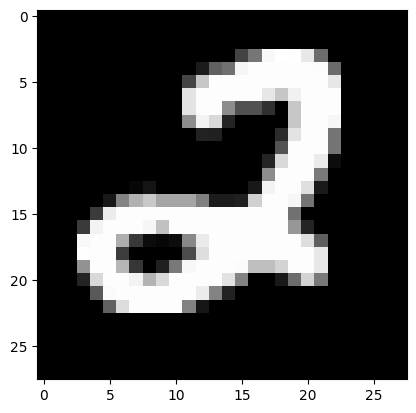

Predicted label for the selected image: 2


In [ ]:
# Combine training and test datasets for visualization
X_flat = X.reshape(-1, 28 * 28)  # Flatten the training images
xt = np.concatenate((X_flat, X_test), axis=0)  # Combine images

# Visualize a random image
index = np.random.randint(0, xt.shape[0])  # Randomly select an index
image1 = xt[index]  # Get the image
image2d = image1.reshape(28, 28)  # Reshape for visualization
plt.imshow(image2d, cmap='gray')  # Display the image
plt.show()  # Show the plot

# Prepare the selected image for prediction
image2 = image1.reshape(-1, 28 * 28)  # Reshape for prediction
y_pred1 = model.predict(image2)  # Predict the label
print(f'Predicted label for the selected image: {y_pred1[0]}')  # Show the prediction


##Task: Adapt the Existing Notebook for Fashion MNIST Classification

##Objective:

Refactor the current notebook designed for MNIST digit classification to handle the Fashion MNIST dataset.

This dataset includes images of clothing items instead of digits, posing a different set of challenges in terms of feature distinction and complexity.

##Steps:
###Replace MNIST with Fashion MNIST:

Update the dataset loading section to fetch the Fashion MNIST dataset instead of the standard MNIST. This involves changing how the data is imported and ensuring that the dataset's structure is compatible with the existing preprocessing and model training code.

###Modify Data Loading:

Import the Fashion MNIST dataset using the following code snippet, which utilizes TensorFlow's Keras API, similar to how the original MNIST dataset was loaded:



```
from tensorflow.keras.datasets import fashion_mnist

(X, y), (X_test, y_test) = fashion_mnist.load_data()

```
###Data Preprocessing:

Ensure that any specific preprocessing steps that were tailored for MNIST (like reshaping) are adjusted if needed to suit the Fashion MNIST data.

Given the similarity in data format (both are 28x28 pixel grayscale images), minimal changes are expected.

###Model Adjustments:

Evaluate whether the existing model architecture and hyperparameters (e.g., choice of kernel in SVM) are suitable for Fashion MNIST.

###Evaluation:

Use the same metrics (accuracy, confusion matrix) to evaluate the model on the Fashion MNIST dataset. Compare these results with those obtained from the MNIST model to discuss any differences in performance and potential reasons.

###Visualization:

Adapt the visualization sections to correctly display fashion items instead of digits. This helps in understanding model misclassifications and provides insights into potential improvements.